In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas
from scipy.special import factorial
%matplotlib inline


Условие - https://drive.google.com/drive/u/0/folders/1RpRVVsTgqBHZLevRy897SCCpDmeo3BWZ


План прямо следует из условия - генерим выборку, генерим оценки, визуализируем, сравниваем


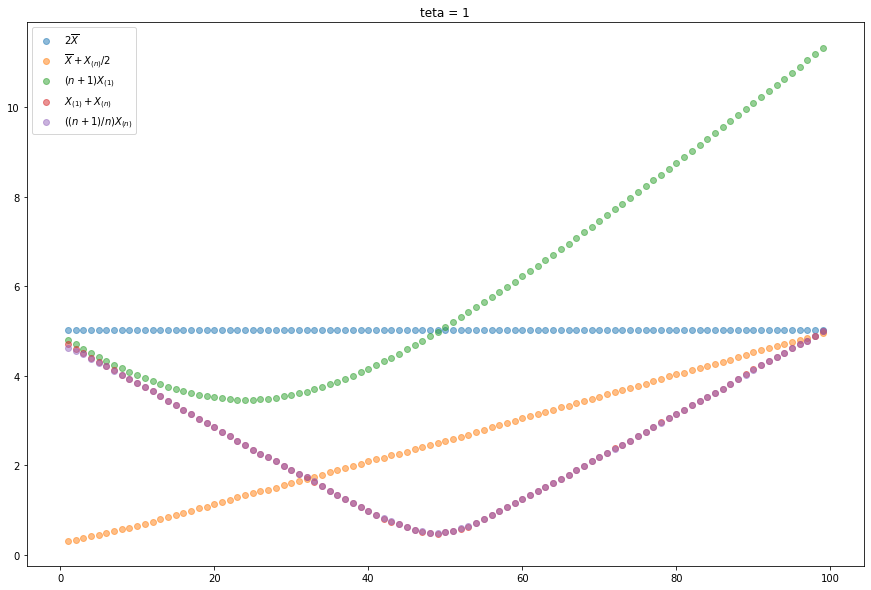

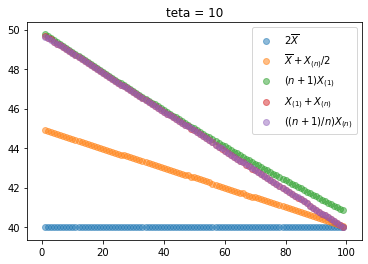

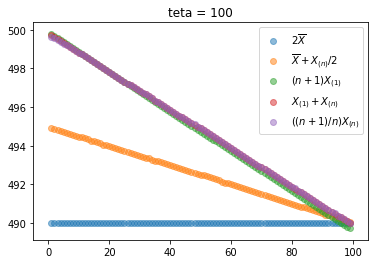

In [7]:

def get_kth_ordered_statistic(k: int):
    return np.partition(array, int(k), axis=1)[:,int(k)]

def get_estimators(n: int):
    doubled_x_with_roof = 2*array.mean(axis=1) # 2X с крышкой
    mean_plus_half_of_xn = array.mean(axis=1) + get_kth_ordered_statistic(n) / 2
    n_plus_1_x1 = (n + 1) * array.min(axis=1)
    x1_plus_xn = array.min(axis=1) + get_kth_ordered_statistic(n)
    n_nplus1_xn = ((n+1) / n) * get_kth_ordered_statistic(n)
    
    return (doubled_x_with_roof, mean_plus_half_of_xn, n_plus_1_x1, x1_plus_xn, n_nplus1_xn)

def get_ys(N: int): # возвращает массив кортежей с игриками для каждого икса
    return np.array([[np.linalg.norm(estimator - teta / 2)for estimator in get_estimators(n)] for n in range(1, N)])
        
randvar_count = 10000
sample_count = 10
teta = 1
plt.figure(figsize=(15, 10))
estimator_labels = ['$2\overline{X}$', '$\overline{X} + X_{(n)}$/2', '$(n+1)X_{(1)}$', '$X_{(1)} + X_{(n)}$',
                    '$((n+1)/n)X_{(n)}$']

array = sps.uniform.rvs(size=(sample_count, randvar_count), scale=teta)

def exec_experiment(_teta):
    global teta
    teta = _teta

    X = np.arange(1, randvar_count)
    Ys = get_ys(randvar_count)
    for i in range(len(Ys[0])): # длина первого кортежа - количество оценок -> количество графиков
        Y = [sample[i] for sample in Ys]
        
        plt.scatter(X, Y, alpha=0.5, label=estimator_labels[i])   
        plt.legend()
        plt.title('teta = %s' % _teta)
    
    plt.show()
    
exec_experiment(1)
exec_experiment(10)
exec_experiment(100)


Как мы можем убедиться по графикам, что при достаточно малом тета оценка $((n+1)/n)*X_{(n)}$ всех лучше аппроксимирует истинный параметр. Однако при тета близких к 100 оценка $2\overline{X}$ аппроксимирует ещё лучше